Regression coefficients: [ 90.57291617  -0.76497179]
Predicted Y value: 57.4190386629


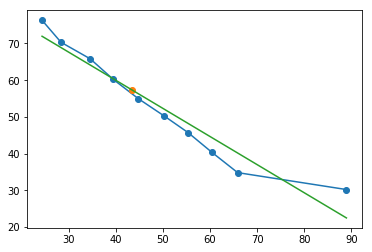

In [10]:
"""
Assignment #1: linear regression
"""

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# regression function
def fn(x, a, b):
    return a + b*x

x_train = [24.32, 28.34, 34.56, 39.45, 44.76, 50.32, 55.34, 60.43, 65.87, 88.98]
y_train = [76.33, 70.34, 65.82, 60.23, 54.99, 50.22, 45.74, 40.34, 34.84, 30.23]

coefs, pcov = curve_fit(fn, x_train, y_train)
print('Regression coefficients:', coefs)

x_test = 43.34
y_test = fn(x_test, *coefs)
print('Predicted Y value:', y_test)

x_0 = 24.32
y_0 = fn(x_0, *coefs)
x_n = 88.98
y_n = fn(x_n, *coefs)

plt.plot(x_train, y_train, '-o')
plt.plot(x_test, y_test, '-o')
plt.plot([x_0, x_n], [y_0, y_n])
plt.show()

In [11]:
"""
Assignment #2: multiple linear regression
"""

from scipy.optimize import curve_fit

# multiple regression function
def fn(x, a, b, c, d):
    return a + b*x[0] + c*x[1] + d*x[2]

x1_train = [1, 5, 12, 23, 34, 53, 66, 69, 78]
x2_train = [88, 77, 66, 56, 43, 34, 31, 23, 22]
x3_train = [11, 32, 34, 45, 48, 65, 77, 88, 96]
y_train = [2, 4, 8, 12, 17, 32, 54, 65, 77]

coefs, pcov = curve_fit(fn, [x1_train, x2_train, x3_train], y_train)
print('Regression coefficients:', coefs)

x1_test = 33
x2_test = 50
x3_test = 54
y_test = fn([x1_test, x2_test, x3_test], *coefs)
print('Predicted Y value:', y_test)

Regression coefficients: [-104.61994959    1.0608639     1.07290974    0.76359813]
Predicted Y value: 25.2683449774


In [84]:
"""
Assignment #3: multi-collinearity test
"""

import pandas as pd
import numpy as np
import scipy as sp
from math import log, sqrt

x1 = [1, 5, 12, 23, 33, 34, 53, 66, 69, 78]
x2 = [88, 77, 66, 56, 50, 43, 34, 31, 23, 22]
x3 = [11, 32, 34, 45, 54, 48, 65, 77, 88, 96]
y = [2, 4, 8, 12, 25.3, 17, 32, 54, 65, 77]

dataframe = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})

# 1. Normalize and center dataset
dataframe = (dataframe - dataframe.mean()) / dataframe.var()
print('Normalized dataset:\n', dataframe)
print()

# 2. Find correlation matrix
corr_matrix = dataframe.corr()
print('Correlation matrix:\n', corr_matrix)
print()

# 3. Find Chi-squared value
determinant = np.linalg.det(corr_matrix.as_matrix())
m = len(dataframe)
n = len(dataframe.keys())
chi_squared = - ((m - 1) - (2 * n + 5) / 6) * log(determinant)
print('Chi squared value:', chi_squared)
print('Chi squared value turns out to be greater than any table value with 3 degrees of freedom => dataset contains multi-collinear vectors')
print()

# 4. Find inverted matrix
inv_corr_matrix = sp.linalg.inv(corr_matrix.as_matrix())
print('Inverted correlation matrix:\n', inv_corr_matrix)
print()

# 5. Calculate F-test values
f = [abs(inv_corr_matrix[i][i] - 1) * (m - n) / (n - 1) for i in range(n)]
print('F-test values:', f)
print('From F-test tables(http://www.socr.ucla.edu/applets.dir/f_table.html) with probability α = 0.01 and degrees of freedom - 7,2 vector x1 is multi-colinear to others')
print()

# 6. Calculate partial correlation coefficients
p = [[-inv_corr_matrix[i][j] / sqrt(inv_corr_matrix[i][i] * inv_corr_matrix[j][j]) for j in range(n)] for i in range(n)]
print('Partial correlation coefficients:\n', p)
print()

# 7. Calculate Student-test values
t = [[abs(p[i][j] * sqrt(m - n) / sqrt(1 - p[i][j] ** 2)) for j in range(n)] for i in range(n)]
print('Student-test values:\n', t)
print('From T-test table(http://statpsy.ru/t-student/t-test-tablica/) if we take value with 7 degrees of freedom and p=0.05 - 2.365. So multiolinear are vectors x1 and x3')
print()

Normalized dataset:
          x1        x2        x3
0 -0.047026  0.075744 -0.061778
1 -0.041858  0.054381 -0.032293
2 -0.032815  0.033017 -0.029485
3 -0.018604  0.013595 -0.014041
4 -0.005684  0.001942 -0.001404
5 -0.004393 -0.011653 -0.009828
6  0.020154 -0.029132  0.014041
7  0.036949 -0.034959  0.030889
8  0.040825 -0.050496  0.046334
9  0.052452 -0.052438  0.057566

Correlation matrix:
           x1        x2        x3
x1  1.000000 -0.969771  0.979437
x2 -0.969771  1.000000 -0.964564
x3  0.979437 -0.964564  1.000000

Chi squared value: 43.83371066013893
Chi squared value turns out to be greater than any table value with 3 degrees of freedom => dataset contains multi-collinear vectors

Inverted correlation matrix:
 [[ 31.55024235  11.34907256 -19.9545652 ]
 [ 11.34907256  18.44678787   6.67740366]
 [-19.9545652    6.67740366  26.98501783]]

F-test values: [106.92584822363089, 61.063757561443111, 90.947562403128984]
From F-test tables(http://www.socr.ucla.edu/applets.dir/f_table.htm

/Users/d.voitekh/.pyenv/versions/3.6.2/envs/virtualenv-3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars


In [82]:
"""
Assignment #4: heteroscedasticity test
"""

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# multiple regression function
def fn(x, a, b, c, d):
    return a + b*x[0] + c*x[1] + d*x[2]

x1 = [1, 5, 12, 23, 33, 34, 53, 66, 69, 78]
x2 = [88, 77, 66, 56, 50, 43, 34, 31, 23, 22]
x3 = [11, 32, 34, 45, 54, 48, 65, 77, 88, 96]
y = [2, 4, 8, 12, 25.3, 17, 32, 54, 65, 77]

# 1. Dataset is already sorted
n = 10
c = 2
m = 3
assert((n - c) / 2 > m)

# 2. Take first 4 elements as 'low' and 4 last elements as 'high' (2 elements in the middle are excluded)
dataframe = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
low = dataframe.as_matrix()[:4]
high = dataframe.as_matrix()[5:]

# 3. Build linear regression models for both segments
low_coefs, _ = curve_fit(fn, [low[:, 0], low[:, 1], low[:, 2]], low[:, 3])
high_coefs, _ = curve_fit(fn, [high[:, 0], high[:, 1], high[:, 2]], high[:, 3])
print('Lower coefficients:', low_coefs)
print('Higher coefficients:', high_coefs)

# 4. Calculate sum squared errors
low_err = 0
high_err = 0
for row in dataframe.as_matrix():
    low_err += (fn(row[:3], *low_coefs) - row[3]) ** 2
    high_err += (fn(row[:3], *high_coefs) - row[3]) ** 2
 
# 5. Calculate F-test value
R = high_err / low_err
print('F-test value:', R)
print('From F-test table(http://www.socr.ucla.edu/applets.dir/f_table.html) find element with %s degrees of freedom' % ((n - c - 2*m) / 2))
print('In table for all probabilitites related values are bigger than R, so hypothesis about absence of heteroscedasticity in the dataset is accepted')

Lower coefficients: [ 23.45283019   0.21855346  -0.23742138  -0.07075472]
Higher coefficients: [-185.70722189   -0.51974083    2.12015005    2.68736738]
F-test value: 1.3288256515
From F-test table(http://www.socr.ucla.edu/applets.dir/f_table.html) find element with 1.0 degrees of freedom
In table for all probabilitites related values are bigger than R, so hypothesis about absence of heteroscedasticity in the dataset is accepted


/Users/d.voitekh/.pyenv/versions/3.6.2/envs/virtualenv-3.6.2/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
